### 머신러닝 분류

#### [1] 지도학습(Supervised Learning) : 답이 주어진 상태에서 학습
* 회귀(Regression)
* 분류(Classification)

#### [2] 비지도학습(Unsupervised Learning) : 답이 주어지지 않고 학습
* 군집화(Clustering)
* 차원 축소(Dimension Reduction) : PCA(주성분 분석, Pricipal Component Analysis)

#### [3] 강화 학습(Reinforcement Learning) : 답을 모르고 있는 상태에서 답을 알아가는 강한 인공지능(자아를 갖음, 인간수준), 게임, 알파고(DQN)

### 퍼셉트론과 XOR Problem
- 퍼셉트론 : 다수의 신호(흐름이 있는)를 입력으로 받아 하나의 신호를 출력한다
- XOR Problem : 단층 퍼셉트론으로 XOR 출력을 얻도록 학습 불가

In [10]:
def AND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.5
    tmp = w1*x1 + w2*x2
    if tmp <= theta : # 임계값
        return 0
    elif tmp > theta:
        return 1
print(AND(0,0))    
print(AND(0,1))    
print(AND(1,0))        
print(AND(1,1))        

0
0
0
1


In [11]:
def NAND(x1,x2):
    w1,w2,theta = 0.5,0.5,0.5
    tmp = w1*x1 + w2*x2
    if tmp <= theta :  # 임계값
        return 1
    elif tmp > theta:
        return 0

print(NAND(0,0))    
print(NAND(0,1))
print(NAND(1,0))
print(NAND(1,1))  

1
1
1
0


In [14]:
def OR(x1,x2):
    w1,w2,theta = 0.5,0.5,0.4
    tmp = w1*x1 + w2*x2
    if tmp <= theta :  # 임계값
        return 0
    elif tmp > theta:
        return 1

print(OR(0,0))    
print(OR(0,1))
print(OR(1,0))
print(OR(1,1))  

0
1
1
1


In [15]:
# 단층 퍼셉트론의 한계
# XOR Problem : 아무리 학습시켜도 weight을 구할 수 가 없음
# def XOR(x1,x2):
#     w1,w2,theta = _,_,_
#     tmp = w1*x1 + w2*x2
#     if tmp <= theta :  # 임계값
#         return 0
#     elif tmp > theta:
#         return 1

# print(XOR(0,0))    # 0 
# print(XOR(0,1))    # 1
# print(XOR(1,0))    # 1
# print(XOR(1,1))    # 0

In [16]:
# XOR Problem 조건 --> 선형으로 해결  , abs()/sin()/exp()
def XOR(x1,x2):
    w1,w2,theta = 0.5,-0.5,0.4
    tmp = abs(w1*x1 + w2*x2)
    if tmp <= theta :  # 임계값
        return 0
    elif tmp > theta:
        return 1

print(XOR(0,0))    # 0 
print(XOR(0,1))    # 1
print(XOR(1,0))    # 1
print(XOR(1,1))    # 0

0
1
1
0


### Backpropagation : 1986년 제프리 힌튼(Geoffrey Hinton)
샘플에 대한 신경망의 오차를 다시 출력층에서부터 입력층으로 거꾸로 전파시켜 각 층의 가중치(weight)를 계산하는 방법. 이를 통해 weight와 bias를 알맞게 학습할 수 있다¶

### 다층퍼셉트론(MLP)으로 XOR Problem 해결

In [17]:
# XOR Problem : 서로 다른 weight을 갖는 다층신경망을 사용하여 해결
def XOR(x1,x2):
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

print(XOR(0,0))    # 0 
print(XOR(0,1))    # 1
print(XOR(1,0))    # 1
print(XOR(1,1))    # 0

0
1
1
0


### 회귀(Regression)모델
#### [1] 선형 회귀(Linear Regression) : 1차 함수, 직선의 방정식
#### [2] 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정, 기울기 값 , 회귀 계수
#### [3] 편향(Bias) : 기본 출력 값이 활성화 되는 정도를 설정, y 절편, 회귀 계수
#### [4] 비용함수(Cost Function) : 2차 함수, 포물선의 방정식, (예측값 - 실제값)^2
* cost(비용) = 오차 = 에러 = 손실(loss)
* cost(W,b) = (H(x) - y)^2

#### [5] 예측(가설,Hypothesis)함수: predict, H(x) : 예측값, y값:답,결정값,target,label, x:입력, 피쳐(feature)
* H(X) = W*X + b

#### [6] 경사 하강법(Gradient Descent Algorithm)
#### : 비용(cost) 이 가장 작은 Weight(가중치) 값을 구하는 알고리즘

w:-1,cost: 18.666666666666668
w:0 ,cost: 4.666666666666667
w:1 ,cost: 0.0
w:2 ,cost: 4.666666666666667
w:3 ,cost: 18.666666666666668


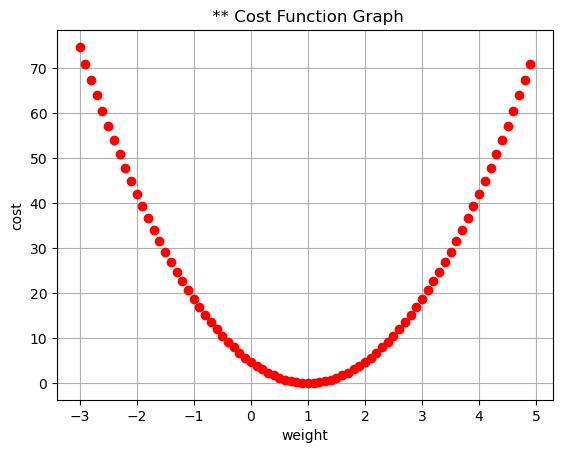

In [29]:
# 비용 함수의 구현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cost(x,y,w):
    c = 0
    for k in range(len(x)):  
        hx = w * x[k]               # 예측 함수(방정식)
        loss = (hx - y[k])**2       # (예측값 - 실제값)^2
        c += loss
    return c/len(x)                 # 평균 제곱 오차

x = [1,2,3]
y = [1,2,3]

print('w:-1,cost:',cost(x,y,-1))    # hx = [-1,-2,-3], cost: 18.666666666666668
print('w:0 ,cost:',cost(x,y,0))     # hx = [0,0,0]    ,cost: 4.666666666666667
print('w:1 ,cost:',cost(x,y,1))     # hx = [1,2,3]    ,cost: 0.0
print('w:2 ,cost:',cost(x,y,2))     # hx = [2,4,6]    ,cost: 4.666666666666667
print('w:3 ,cost:',cost(x,y,3))     # hx = [3,6,9]    ,cost: 18.666666666666668

# 비용함수의 시각화 : x축은 weight, y축은 cost로 하는 2차 함수, 포물선의 방정식
for k in range(-30,50):
    w = k/10
    c = cost(x,y,w)
    plt.plot(w,c,'ro')

plt.title(' ** Cost Function Graph')    
plt.xlabel('weight')    
plt.ylabel('cost')
plt.grid()
plt.show()       

### 미분 : 순간 변화량, 기울기, x축으로 1만큼 움직였을 때 y축으로 움직인 거리
#### 함수의 미분 공식 정리 :  f(x) = x^n   ====> f'(x) = n*x^(n-1)
* y = 3            ===> y' = 0
* y = 2*x          ===> y' = 2
* y = x^2          ===> y' = 2*x
* y = (x + 1)^2    ===> y' = 2**(x + 1) # y = x^2 + 2**x + 1  ===> 2**x + 2

* 곱셈 공식 : (a + b)^2 = a^2 + 2**a**b + b^2

In [32]:
# 경사 하강법 알고리즘 함수 구현, 미분 적용
def gradient_descent(x,y,w):
    c = 0
    for k in range(len(x)):
        hx = w*x[k] 
        loss = (hx - y[k])*x[k]     # 곱하기 2를 생략한 비용함수의 미분
        c += loss
        # 비용함수의 미분 : cost(w) = (w*x[k] - y[k])^2 의 미분
        # cost(w) = w^2 * x[k]^2 - 2*w*x[k]*y[k] + y[k]^2
        # cost'(w) = 2*w*x[k]^2 - 2*x[k]*y[k] = 2*x[k]*(w*x[k] - y[k])
        # =  2*x[k]*(hx - y[k])
    return c/len(x)

# x = [1,2,3]
# y = [1.2,3.2,5.4]

# 학습 시작(train,fit) 시작
print('----------- start learning!!')
w , old = 10, 100
for k in range(1000):
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w -= 0.1*grad  # 0.1:학습율(learning rate),하이퍼 파라메터,가중치의 업데이트실행
    print('[%03d]'%k,'cost:',c,'old:',old,'weight:',w)
#   if c == old:  # cost의 변화가 없을 때
    if c >= old and abs(c - old) < 1.0e-15: # cost가 1.0e-15값 보다도 더 줄지 않을 때
        break
    old = c
print('----------- end learning!!')
print('weight:',w,'train:',k+1,'회')

----------- start learning!!
[000] cost: 321.6133333333334 old: 100 weight: 6.126666666666665
[001] cost: 91.57176296296291 old: 321.6133333333334 weight: 4.060888888888888
[002] cost: 26.13771627983537 old: 91.57176296296291 weight: 2.9591407407407404
[003] cost: 7.525365223301324 old: 26.13771627983537 weight: 2.3715417283950613
[004] cost: 2.231185367220522 old: 7.525365223301324 weight: 2.058155588477366
[005] cost: 0.7252853192686527 old: 2.231185367220522 weight: 1.8910163138545952
[006] cost: 0.2969404167401203 old: 0.7252853192686527 weight: 1.8018753673891175
[007] cost: 0.17510008890978238 old: 0.2969404167401203 weight: 1.754333529274196
[008] cost: 0.14044328454915292 old: 0.17510008890978238 weight: 1.7289778822795712
[009] cost: 0.13058534908657382 old: 0.14044328454915292 weight: 1.7154548705491046
[010] cost: 0.12778131411055135 old: 0.13058534908657382 weight: 1.7082425976261892
[011] cost: 0.12698372193959387 old: 0.12778131411055135 weight: 1.704396052067301
[012] co